# Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Samples of non-Linear

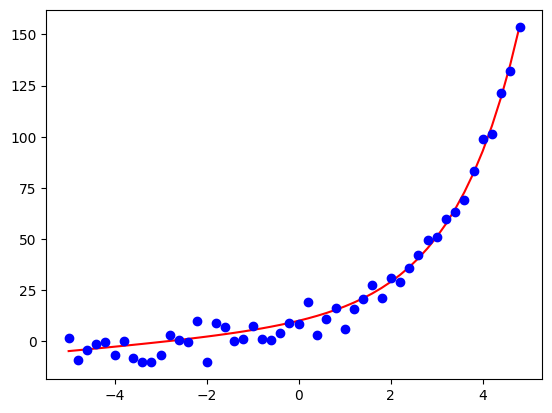

In [24]:
x = np.arange(-5, 5, 0.2)
y = 5*np.power(2, x) + 2*x + 5
ynoise = 4*np.random.normal(size=x.size)
ydata = y + ynoise

plt.plot(x, y, 'r')
plt.plot(x, ydata, 'bo')

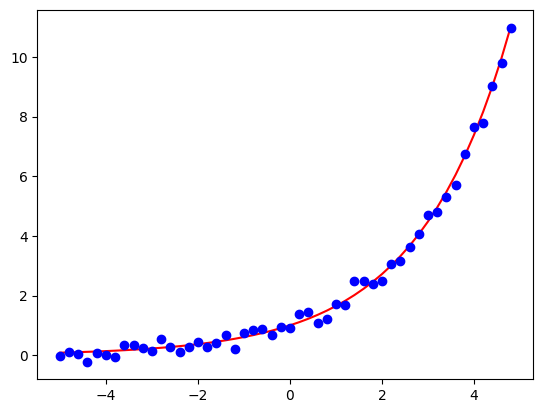

In [21]:
x = np.arange(-5, 5, 0.2)
y = np.exp(0.5*x)
ynoise = 0.2*np.random.normal(size=x.size)
ydata = y + ynoise

plt.plot(x, y, 'r')
plt.plot(x, ydata, 'bo')

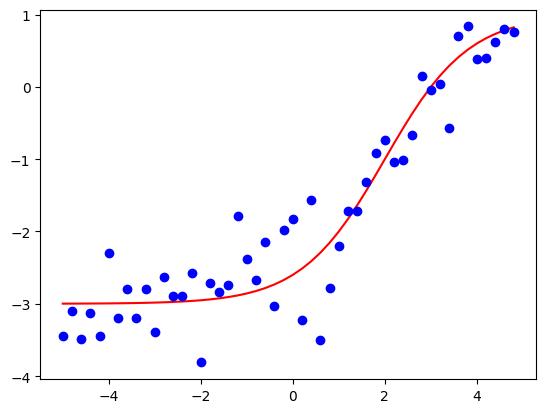

In [34]:
#### x = np.arange(-5, 5, 0.2)
y = 1-4/(1+np.power(3, x-2))
ynoise = 0.5*np.random.normal(size=x.size)
ydata = y + ynoise

plt.plot(x, y, 'r')
plt.plot(x, ydata, 'bo')

# Non-Linear Regression for China GDP >>>>> Scatter

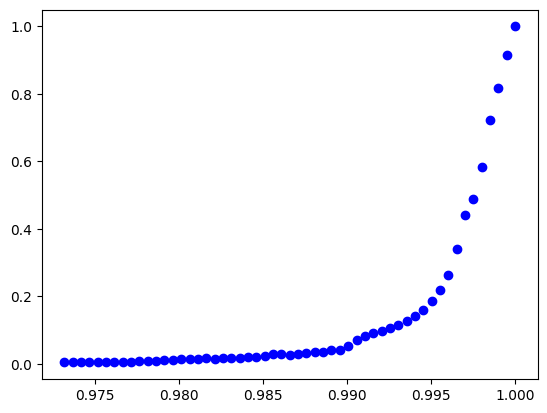

In [67]:
df = pd.read_csv("china_gdp.csv")
cdf = df[['Year', 'Value']]

xdata = cdf['Year'].values
ydata = cdf['Value'].values

x_norm = xdata/max(xdata)
y_norm = ydata/max(ydata)

plt.scatter(x_norm, y_norm, color='blue')

# Non-Linear Regression for China GDP >>>> Choosing Model

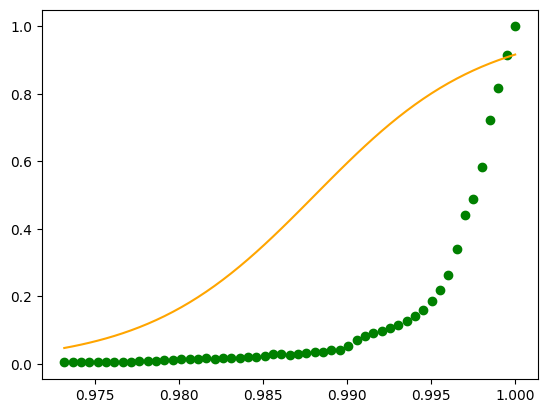

In [69]:
def sigmoid (x, a, b):
    y = 1/(1+np.exp(a*(x-b)))
    return y

a1 = -0.1
b1 = 1990
y_example = sigmoid(xdata, a1, b1)

plt.plot(x_norm, y_example, color='orange')
plt.scatter(x_norm, y_norm, color='green')


# Non-Linear Regression for China GDP >>>> Fitting + Chart


In [73]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm, y_norm)

print("a = ", popt[0])
print("b = ", popt[1])

a =  -690.4502830419807
b =  0.9972071257855606


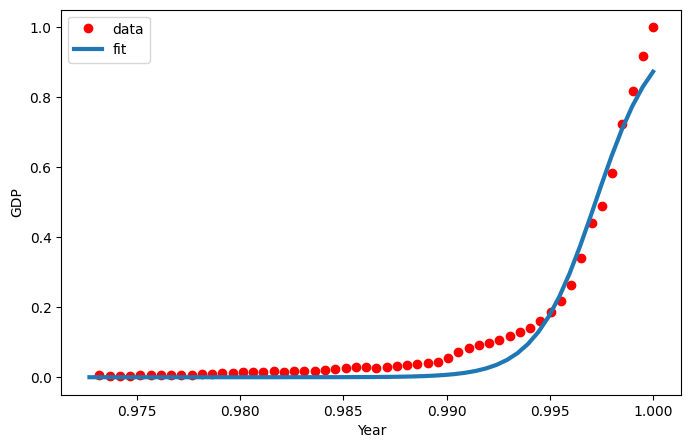

In [79]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()